### Principle Component Analysis on Retail Images

This notebook examines the results of using PCA on the refined dataset of 32,201 flattened, greyscale images. This was one step in my exploratory analysis of the image data. It is a relatively simple and quick way to visualize some of the differences across the images. 

To follow along with the code below, you'll need to download the dataset here: xxx. You can replicate my data cleaning & processing by running load.py from the Processing section of this repo. 

In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

%matplotlib inline 

In [408]:
df= pd.read_csv('../data/full_labels_df.csv')

In [409]:
loaded2 = np.load('../data/full_image_arr.npz')
image_arr = loaded2['b']/255

In [410]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
3,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
4,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt


### Top 25

In [411]:
from sklearn.decomposition import PCA

In [412]:
pca25 = PCA(n_components=25)

In [413]:
full_pca25 = pca25.fit_transform(image_arr)

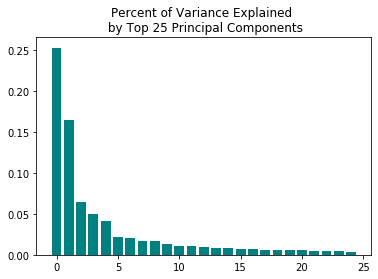

In [447]:
plt.bar(range(25),pca25.explained_variance_ratio_, color='teal')
plt.title('Percent of Variance Explained \n by Top 25 Principal Components')
plt.show()

In [415]:
pca25.explained_variance_ratio_[:25].sum()

0.7620548388063028

### Plotting the top two principal components

In [416]:
pca = PCA(n_components=2)

In [417]:
full_pca = pca.fit_transform(image_arr)

In [418]:
full_pca.shape

(32201, 2)

In [24]:
# ## only run once:
# df['pca_1'] = full_pca[:,0]
# df['pca_2'] = full_pca[:,1]

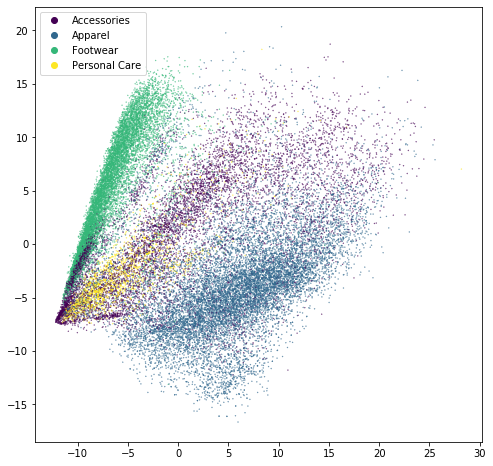

In [422]:
masterCat_codes = {'Accessories':0,'Apparel':1, 'Footwear':2, 'Personal Care':3}
df['colors'] = df['masterCategory'].apply(lambda x: masterCat_codes[x])
fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.scatter( *full_pca.T, s=.1 , c=df['colors'], label= df['masterCategory'], cmap='viridis');
ax.legend(handles=scatter.legend_elements(num=[0,1,2,3])[0], labels=masterCat_codes.keys())
plt.show()

In [399]:
pca.explained_variance_ratio_

array([0.25255391, 0.16384011])

### Sub-Categories

In [404]:
def plot_subcat_PCA(df, cat_list, row=1, col=None):
    if col == None:
        col = len(cat_list)
    fig, axs = plt.subplots(row, col, figsize=(8*row, 8*col))
    for main_cat, ax in zip(cat_list, axs.flatten()):
        other_cats = list(df[df.masterCategory != main_cat].masterCategory.unique())
        other_cats_df = df[df.masterCategory.isin(other_cats)]
        g0 = other_cats_df[['pca_1', 'pca_2']]
        one_cat_df = df[df.masterCategory == main_cat]
        one_cat_dict = {k:v for v, k in enumerate(one_cat_df.subCategory.unique())} 
        data = [g0]
        groups = [f'Not {main_cat}']
        for k in one_cat_dict.keys():
            data.append(one_cat_df[one_cat_df.subCategory == k])
            groups.append(k)
        color_list = ['#BABABA','DarkBlue', 'purple', 'MediumVioletRed', 'OrangeRed', 'orange', 'DarkTurquoise','MediumSeaGreen']
        colors = color_list[:len(data)]
    
        for data, color, group in zip(data, colors, groups):
            x, y = data.pca_1, data.pca_2
            ax.scatter(x, y, c = color, edgecolors='none', s=2, label=group)
            ax.legend(loc=4, markerscale=4, scatterpoints=3)
            ax.set_title(f'PCA {main_cat} Sub-Categories')  

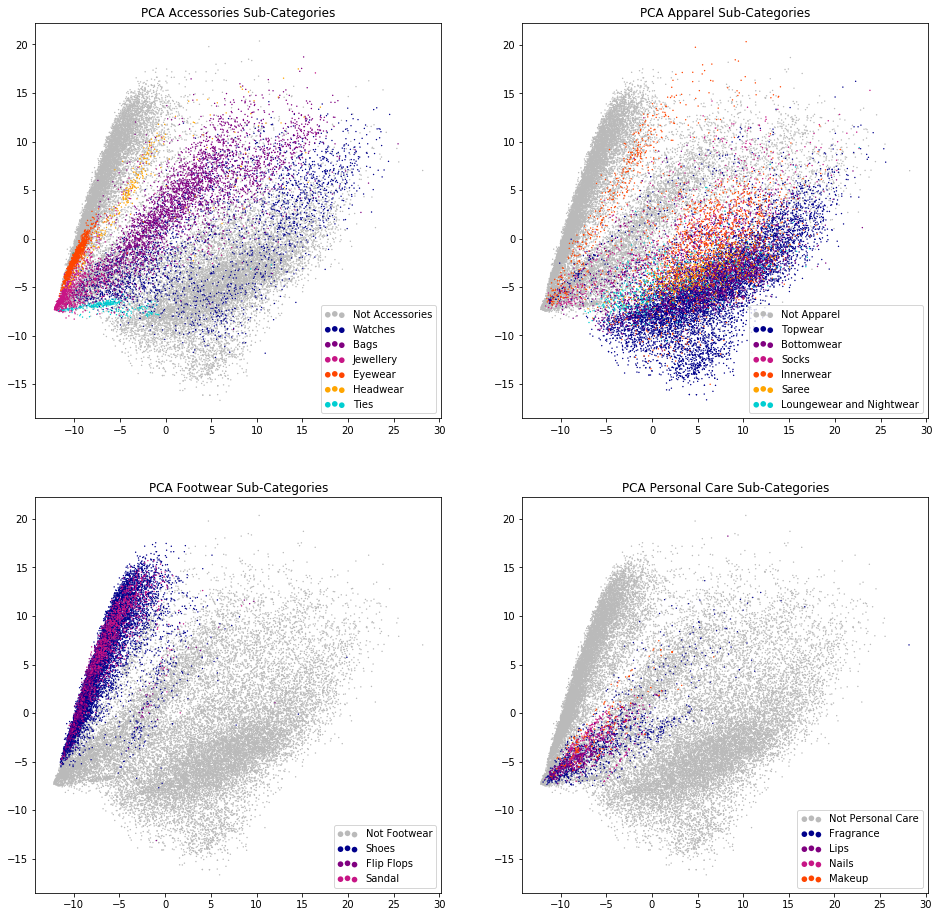

In [405]:
plot_subcat_PCA(df, ['Accessories', 'Apparel', 'Footwear', 'Personal Care'], 2, 2)

## Previous versions of scatter plot code

### Here are two alternative scatterplot codes. 

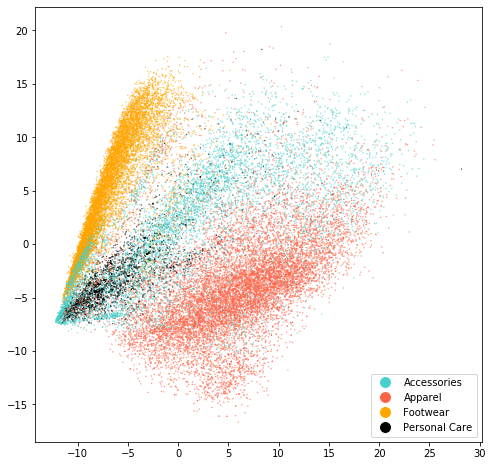

In [150]:
masterCat_colors = {'Apparel':'#FF6347','Accessories':'#48D1CC','Footwear':'#FFA500', 'Personal Care': 'black'}
# masterCat_codes = {'Apparel':1,'Accessories':0,'Footwear':2, 'Personal Care':3}
# masterCat_color_codes = {0:'#FF6347',1:'#48D1CC',2:'#FFA500', 3: 'black'}

df['colors'] = df['masterCategory'].apply(lambda x: masterCat_colors[x])
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter( *full_pca.T, s=.1 , c=df['colors'], label= df['masterCategory']);

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Accessories',
                          markerfacecolor='#48D1CC', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='Apparel',
                          markerfacecolor='#FF6347', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='Footwear',
                          markerfacecolor='#FFA500', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='Personal Care',
                          markerfacecolor='black', markersize=12)]
ax.legend(handles=legend_elements, loc='lower right')
plt.show()

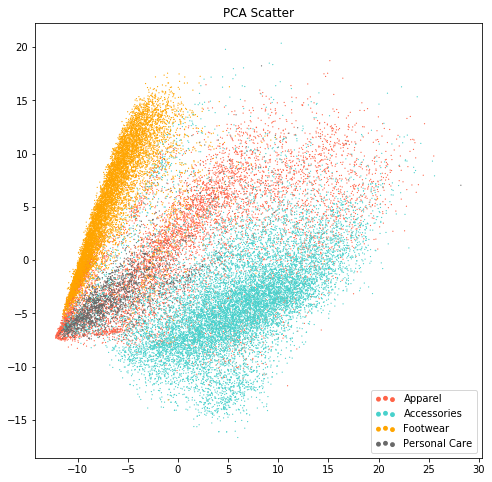

In [398]:
g0 = df[df.masterCategory=='Accessories']
g1 = df[df.masterCategory=='Apparel']
g2 = df[df.masterCategory=='Footwear']
g3 = df[df.masterCategory=='Personal Care']

data = [g0, g1, g2, g3]
groups = ['Apparel','Accessories','Footwear', 'Personal Care']
colors = ['#FF6347','#48D1CC','#FFA500','DimGrey']
# Create plot
fig, ax = plt.subplots(figsize=(8,8))

for data, color, group in zip(data, colors, groups):
    x, y = data.pca_1, data.pca_2
    ax.scatter(x, y, c=color, edgecolors='none', s=1.5, label=group)

plt.title('PCA Scatter')
plt.legend(loc=4, markerscale=4, scatterpoints=3)
plt.show()

### Sub-Category variations:

### First attempt to color code plot by sub-category (specifically for accessories); used this as template to write function "plot_function_PCA"

In [250]:
subCat_dict = {k:v for v, k in enumerate(df.subCategory.unique())} 
article_dict = {k:v for v, k in enumerate(df.subCategory.unique())}
df['sub_colors'] = df['subCategory'].apply(lambda x: subCat_dict[x])
df['article_colors'] = df['subCategory'].apply(lambda x: article_dict[x])

In [ ]:
not_accessory = ['Apparel', 'Footwear', 'Personal Care']
not_accessory_df = df[df.masterCategory.isin(not_accessory)]
x1, y1 = not_accessory_df['pca_1'], not_accessory_df['pca_2']
accessory_df = df[df.masterCategory=='Accessories']
x2, y2, color2 = accessory_df['pca_1'], accessory_df['pca_2'], accessory_df['sub_colors']

In [326]:
accessory_subcat_codes = list(accessory_df.sub_colors.unique())
accessory_subcats = {k:v for k, v in zip(accessory_subcat_codes, accessory_df.subCategory.unique())}

{3: 'Watches', 6: 'Bags', 10: 'Jewellery', 13: 'Eyewear', 16: 'Headwear', 18: 'Ties'}


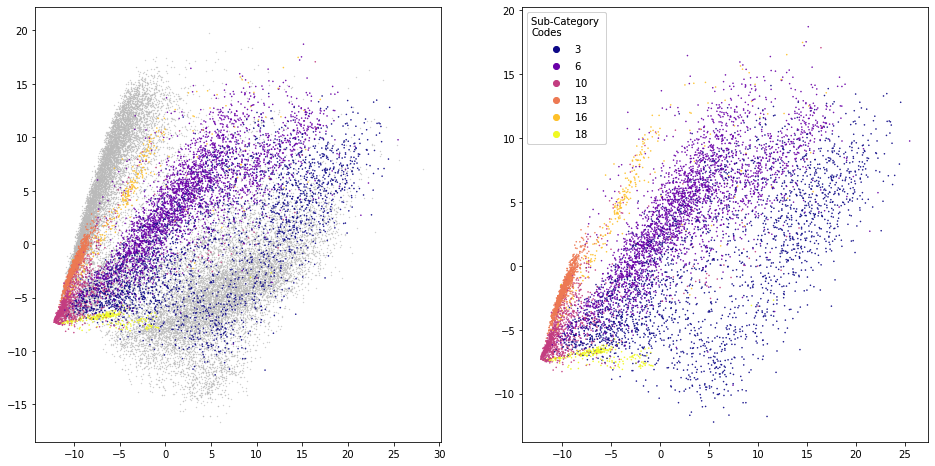

In [327]:
print(accessory_subcats)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].scatter( x1, y1, s=.1 , c='#BABABA')
scatter = ax[0].scatter( x2, y2, s=.3, c=color2, cmap='plasma')
#legend1 = ax[0].legend(*scatter.legend_elements(num=accessory_subcat_codes), loc="upper left", title="Sub-Category \nCodes")
#ax[0].add_artist(legend1)
scatter2 = ax[1].scatter( x2, y2, s=.3, c=color2, cmap='plasma')
legend2 = ax[1].legend(*scatter2.legend_elements(num=accessory_subcat_codes), loc="upper left", title="Sub-Category \nCodes")
ax[1].add_artist(legend2)
plt.show()

### Second version of Plot_Subcat_PCA function ;  improved legend labels, but dependent on the length of color_list exceeding the number of groups. Also, it is more tedious to adjust colors and/or color scheme. 

In [323]:
def plot_subcat_PCA_2(df, main_cat):
    other_cats = list(df[df.masterCategory != main_cat].masterCategory.unique())
    other_cats_df = df[df.masterCategory.isin(other_cats)]
    x1, y1 = other_cats_df['pca_1'], other_cats_df['pca_2']
    one_cat_df = df[df.masterCategory == main_cat]
    one_cat_dict = {k:v for v, k in enumerate(one_cat_df.subCategory.unique())} 
    one_cat_df.loc[:,'sub_colors'] = one_cat_df.loc[:,'subCategory'].apply(lambda x: one_cat_dict[x])
    x2, y2, color2 = one_cat_df['pca_1'], one_cat_df['pca_2'], one_cat_df['sub_colors']
    
    print(one_cat_dict)

    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    ax[0].scatter( x1, y1, s=.1 , c='#BABABA')
    scatter = ax[0].scatter( x2, y2, s=.3, c=color2, cmap='plasma')
    #legend1 = ax[0].legend(*scatter.legend_elements(num=accessory_subcat_codes), loc="upper left", title="Sub-Category \nCodes")
    #ax[0].add_artist(legend1)
    scatter2 = ax[1].scatter( x2, y2, s=.3, c=color2, cmap='plasma')
    legend2 = ax[1].legend(*scatter2.legend_elements(num=range(len(one_cat_dict))), loc="upper left", title="Sub-Category \nCodes")
    ax[1].add_artist(legend2)

    plt.show()

{'Watches': 0, 'Bags': 1, 'Jewellery': 2, 'Eyewear': 3, 'Headwear': 4, 'Ties': 5}


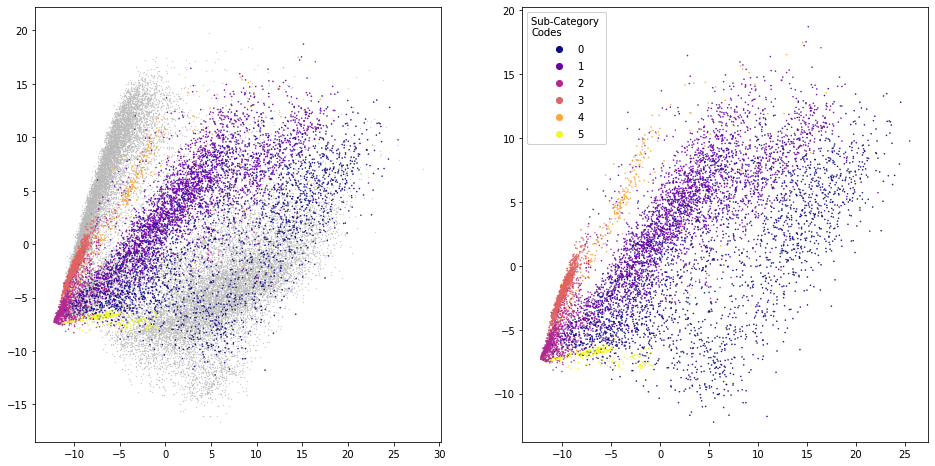

In [324]:
plot_subcat_PCA_2(df, 'Accessories')

{'Topwear': 0, 'Bottomwear': 1, 'Socks': 2, 'Innerwear': 3, 'Saree': 4, 'Loungewear and Nightwear': 5}


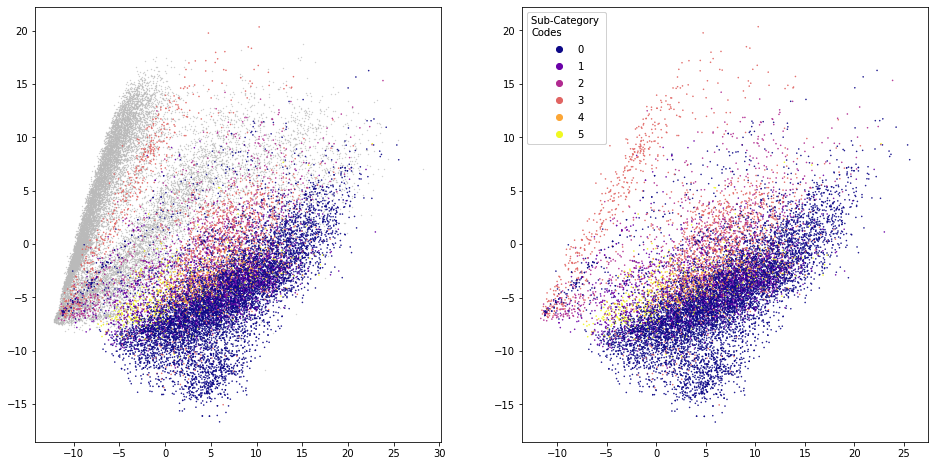

In [345]:
plot_subcat_PCA_2(df, 'Apparel')

{'Shoes': 0, 'Flip Flops': 1, 'Sandal': 2}


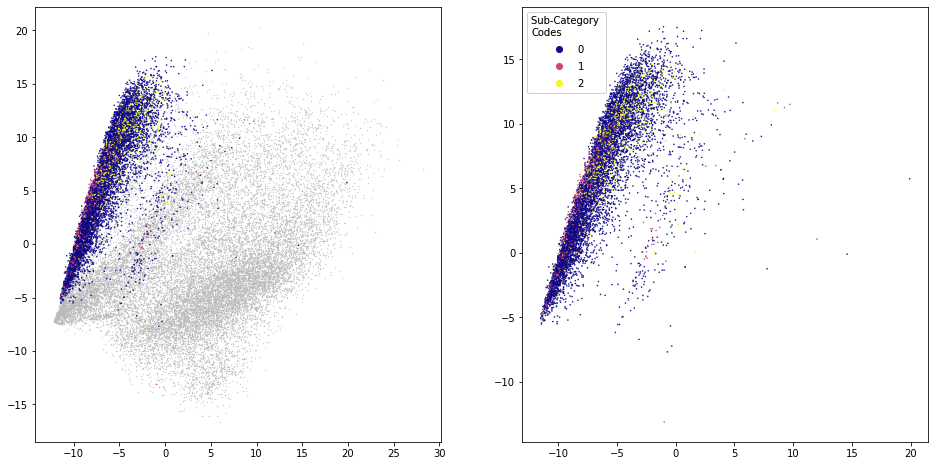

In [346]:
plot_subcat_PCA_2(df, 'Footwear')

{'Fragrance': 0, 'Lips': 1, 'Nails': 2, 'Makeup': 3}


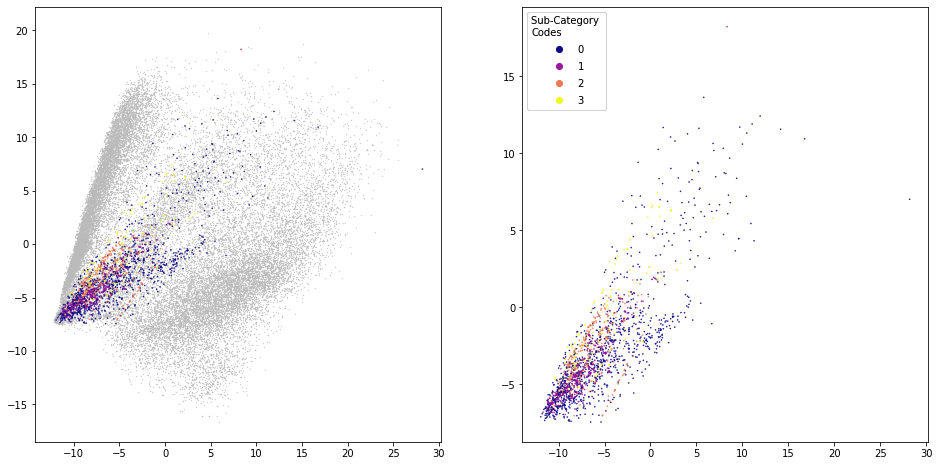

In [347]:
plot_subcat_PCA_2(df, 'Personal Care')

In [207]:
cdict = {'dark cyan':'#008B8B', 'grey':'#808080', "medium_turquoise":'#BA55D3', 'coral':'#F08080', 'dark red':'#8B0000', 'dark orange':'#FF8C00', 'light orange':'#F4A460'}